In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from itertools import chain, combinations
#import lightgbm as lgb




# # Exclude boolean columns (location_A, location_B, location_C)
# columns_to_scale = x_train.columns.difference(['location_A', 'location_B', 'location_C'])

# scaler = MinMaxScaler()
# x_train[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])
# x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
x_train = pd.read_csv('cleaned_and_combined_data/x_train_combined.csv')
y_train = pd.read_csv('cleaned_and_combined_data/y_train_combined.csv')
x_test = pd.read_csv('cleaned_and_combined_data/x_test_combined.csv')

# Determine the split index
split_index = int(0.875 * len(x_train))

# Split the data into training and validation sets
x_train_df = x_train[:split_index]
y_train_df = y_train[:split_index]
x_valid_df = x_train[split_index:]
y_valid_df = y_train[split_index:]

In [3]:

dtrain = xgb.DMatrix(x_train_df,label = y_train_df['pv_measurement'])
dval = xgb.DMatrix(x_valid_df,label = y_valid_df['pv_measurement'])
test = xgb.DMatrix(x_test)


/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_b

### Function for training Lightgbm

### Function for training xgboost

In [4]:

def train_xgb(x_train, y_train, x_valid, y_valid):

    dtrain = xgb.DMatrix(x_train,label = y_train)
    dval = xgb.DMatrix(x_valid,label = y_valid)
    #test = xgb.DMatrix(x_test)

    xgb_params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'mae',
        'booster': 'gbtree',
        'eta': 0.05,
        'max_depth': 6,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'alpha': 0.1,
        'lambda': 1,

    }
    #  Train the model
    num_boost_round = 1000  # Maximum number of boosting rounds
    early_stopping_rounds = 50  # Stop if validation score doesn't improve for 50 rounds

    evals = [(dtrain, 'train'), (dval, 'eval')]
    progress = {}

    bst = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds=early_stopping_rounds,
    evals_result=progress
    )

    print("Best MAE: {:.2f} with {} rounds".format(
         bst.best_score,
         bst.best_iteration+1))
    
    return bst


In [5]:
#train_lgb(x_train_df, y_train_df['pv_measurement'], x_valid_df, y_valid_df['pv_measurement'])

In [36]:
bst = train_xgb(x_train_df, y_train_df['pv_measurement'], x_valid_df, y_valid_df['pv_measurement'])



/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_b

[0]	train-mae:452.54095	eval-mae:378.56331
[1]	train-mae:431.66886	eval-mae:362.20167
[2]	train-mae:412.11426	eval-mae:346.57248
[3]	train-mae:393.62053	eval-mae:331.61868
[4]	train-mae:376.13373	eval-mae:317.42439
[5]	train-mae:359.74671	eval-mae:304.21909
[6]	train-mae:344.28362	eval-mae:291.89698
[7]	train-mae:329.84477	eval-mae:280.31339
[8]	train-mae:316.19138	eval-mae:269.28620
[9]	train-mae:303.44162	eval-mae:258.82848
[10]	train-mae:291.49574	eval-mae:249.02138
[11]	train-mae:280.21878	eval-mae:239.63724
[12]	train-mae:269.70697	eval-mae:230.71270
[13]	train-mae:259.80202	eval-mae:222.32811
[14]	train-mae:250.37977	eval-mae:214.45606
[15]	train-mae:241.60513	eval-mae:206.91658
[16]	train-mae:233.40521	eval-mae:199.73149
[17]	train-mae:225.62527	eval-mae:192.93376
[18]	train-mae:218.33212	eval-mae:186.39042
[19]	train-mae:211.53420	eval-mae:180.33244
[20]	train-mae:205.07867	eval-mae:174.56846
[21]	train-mae:199.00927	eval-mae:169.09521
[22]	train-mae:193.26994	eval-mae:163.9349

TypeError: missing a required argument: 'y_pred'

# Feature importances 
Weight:
- It represents the number of times a feature appears in a tree across all trees in the model.
- This is a basic measure that tells you which features were used most frequently to make decisions, but it doesn't necessarily capture the "quality" of those decisions.

Gain:
- It measures the improvement in accuracy that is brought by a feature to the branches it's on.
- More specifically, for a given feature, the gain is the average contribution of the feature when it's used in trees.
- This measure can help identify features that lead to "strong" decisions, even if they aren't used as frequently.

Cover:
- It represents the number of observations concerned by a feature.
- For a given feature, cover measures the quantity (or proportion) of the data that's affected by splits on this feature.
- This metric can be useful to identify features that help make decisions on larger chunks of the data.

In [9]:
feature_by_weight = bst.get_score(importance_type="weight")
feature_by_weight = sorted(feature_by_weight.items(), key=lambda x: x[1], reverse=True)
feature_by_weight = [feature[0] for feature in feature_by_weight]

feature_by_gain = bst.get_score(importance_type="gain")
feature_by_gain =  sorted(feature_by_gain.items(), key=lambda x: x[1], reverse=True)
feature_by_gain = [feature[0] for feature in feature_by_gain]

feature_by_cover = bst.get_score(importance_type="cover")
feature_by_cover = sorted(feature_by_cover.items(), key=lambda x: x[1], reverse=True)
feature_by_cover = [feature[0] for feature in feature_by_cover]
print(feature_by_cover)

['is_day:idx', 'is_in_shadow:idx', 'diffuse_rad:W', 'direct_rad:W', 'diffuse_rad_1h:J', 'clear_sky_rad:W', 'sun_elevation:d', 'clear_sky_energy_1h:J', 'direct_rad_1h:J', 'snow_depth:cm', 'fresh_snow_24h:cm', 'forecast_hour', 'snow_melt_10min:mm', 'precip_5min:mm', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'fresh_snow_6h:cm', 'forecast_day', 'dew_point_2m:K', 'snow_density:kgm3', 'wind_speed_v_10m:ms', 'wind_speed_u_10m:ms', 'forecast_month', 'air_density_2m:kgm3', 'forecast_year', 'cloud_base_agl:m', 'calc_day', 'sun_azimuth:d', 'location_C', 'sfc_pressure:hPa', 'elevation:m', 'location_A', 'total_cloud_cover:p', 'effective_cloud_cover:p', 'relative_humidity_1000hPa:p', 'wind_speed_10m:ms', 'location_B', 'pressure_100m:hPa', 'ceiling_height_agl:m', 'precip_type_5min:idx', 'snow_water:kgm2', 'visibility:m', 'rain_water:kgm2', 'pressure_50m:hPa', 'msl_pressure:hPa', 'fresh_snow_12h:cm', 'absolute_humidity_2m:gm3', 'wind_speed_w_1000hPa:ms']


### Plot of feature importances

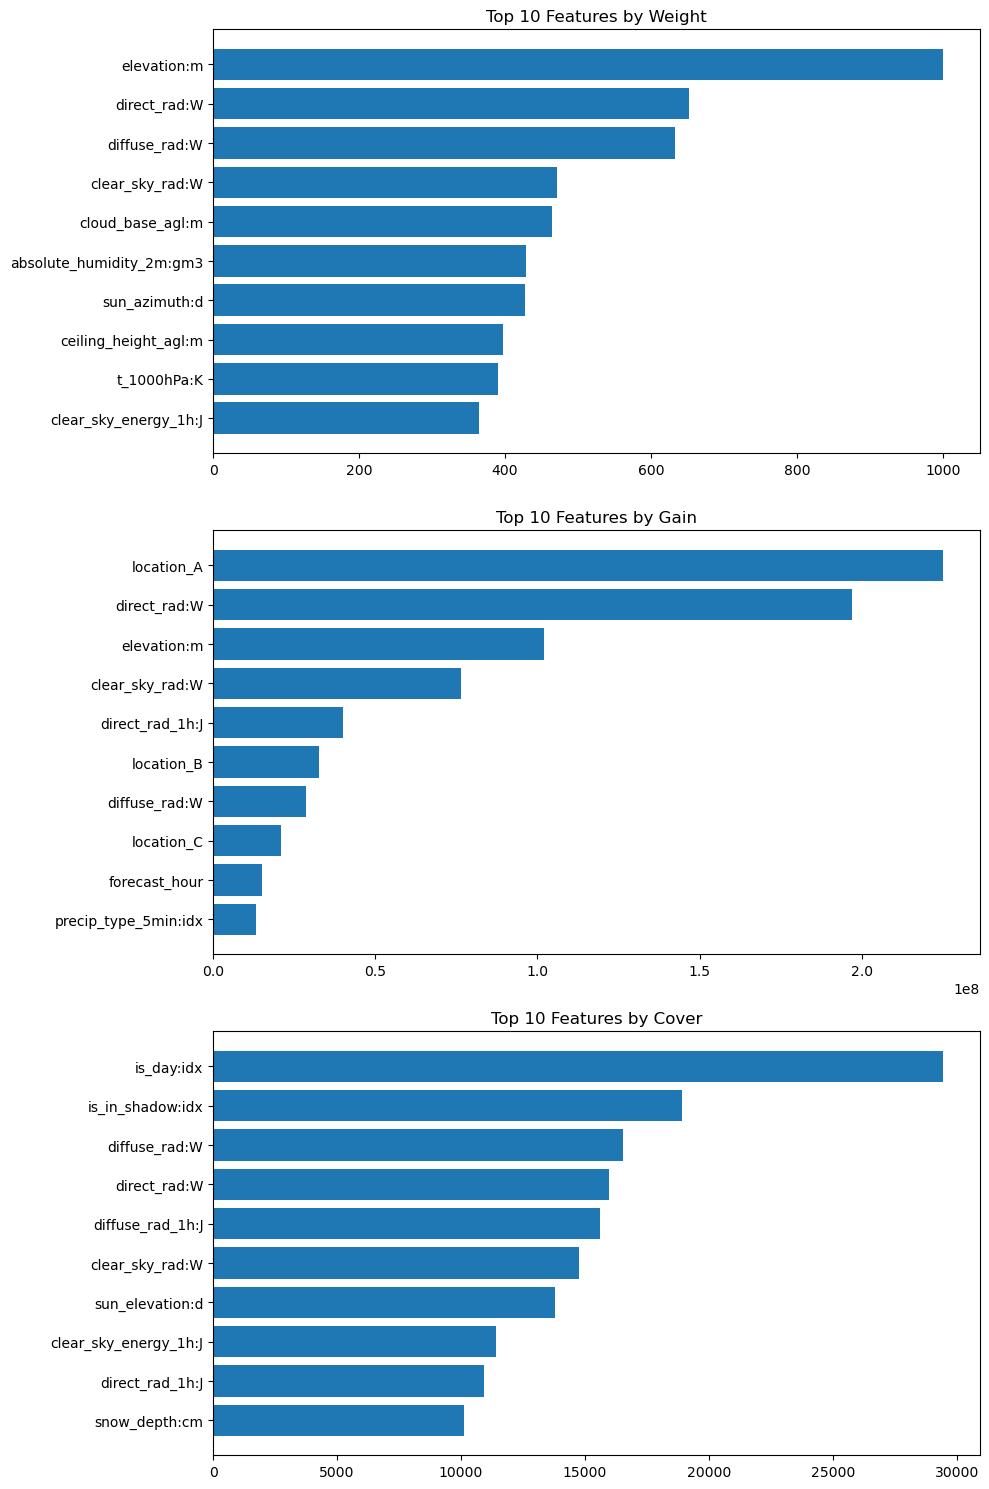

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot for Weight
axes[0].barh(feature_by_weight[:10], sorted(bst.get_score(importance_type="weight").values(), reverse=True)[:10])
axes[0].set_title("Top 10 Features by Weight")
axes[0].invert_yaxis()

# Plot for Gain
axes[1].barh(feature_by_gain[:10], sorted(bst.get_score(importance_type="gain").values(), reverse=True)[:10])
axes[1].set_title("Top 10 Features by Gain")
axes[1].invert_yaxis()

# Plot for Cover
axes[2].barh(feature_by_cover[:10], sorted(bst.get_score(importance_type="cover").values(), reverse=True)[:10])
axes[2].set_title("Top 10 Features by Cover")
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

### Help functions etc

In [31]:
#Function that get top features from each of the three types of importances (without duplicates)
def get_top_features(weight_list, gain_list, cover_list, nr_features):
    top_features = []

    for feature in weight_list[:nr_features]:
        if feature not in top_features:
            top_features.append(feature)

    for feature in gain_list[:nr_features]:
        if feature not in top_features:
            top_features.append(feature)

    for feature in cover_list[:nr_features]:
        if feature not in top_features:
            top_features.append(feature)

    return top_features

top_features_17 = get_top_features(feature_by_weight, feature_by_gain, feature_by_cover, 17)
#top_features_17.append('visibility:m')
columns = x_train_df.columns



In [34]:
extra_feature = []
for i in columns:
    if i not in top_features_17:
        extra_feature.append(i)

xgb_params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'mae',
        'booster': 'gbtree',
        'eta': 0.05,
        'max_depth': 6,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'alpha': 0.1,
        'lambda': 1,
    }

num_boost_round = 1000  # Maximum number of boosting rounds
early_stopping_rounds = 50  # Stop if validation score doesn't improve for 50 rounds
progress_current = {}


def one_feat_add_to_17():
    results = []
    for i in extra_feature:
        base_feature = top_features_17
        base_feature.append(i)
        bst = xgb.train(x_train_df[base_feature],y_train_df['pv_measurement'])
          
        preds = bst.predict(x_valid_df[base_feature])
        mae = mean_absolute_error(y_valid_df['pv_measurement'], preds)
        results.append(mae)
    

    return results
        

        


#bst_feat = train_xgb(x_train_df[top_features_17], y_train_df['pv_measurement'], x_valid_df[top_features_17], y_valid_df['pv_measurement'])


In [35]:
results = one_feat_add_to_17()

/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_b

TypeError: 'DMatrix' object is not iterable

In [ ]:
for res in evaluation_results:
    print(f"Nr of features from each list {res[0]}MAE: {res[1]:.2f}, Newly Added Features: {res[2]}")

In [23]:
def evaluate_feature_increment(weight_list, gain_list, cover_list, min_nr_features,max_nr_features):
    results = []
    previous_top_features = []

    for nr in range(min_nr_features, max_nr_features+1):
        # Get the top features for the current iteration
        current_top_features = get_top_features(weight_list, gain_list, cover_list, nr)
        if nr == 18:
            print("-"*50)
            print(current_top_features)
        # Identify the new feature added compared to the previous iteration
        newly_added_features = [item for item in current_top_features if item not in previous_top_features]

        # Use the current top features for training and evaluation
        x_train_df_current = x_train_df[current_top_features]
        x_valid_df_current = x_valid_df[current_top_features]

        dtrain_current = xgb.DMatrix(x_train_df_current, label=y_train_df['pv_measurement'])
        dval_current = xgb.DMatrix(x_valid_df_current, label=y_valid_df['pv_measurement'])

        evals_current = [(dtrain_current, 'train'), (dval_current, 'eval')]
        progress_current = {}

        bst_current = xgb.train(
            xgb_params,
            dtrain_current,
            num_boost_round=num_boost_round,
            evals=evals_current,
            early_stopping_rounds=early_stopping_rounds,
            evals_result=progress_current,
            verbose_eval=False  # Set to False to suppress iteration logs
        )

        # Store the MAE and the newly added feature(s)
        results.append((str(nr),progress_current['eval']['mae'][-1], newly_added_features))

        # Update the previous_top_features for the next iteration
        previous_top_features = current_top_features

    return results

# Call the function
min_features_to_evaluate = 1
max_features_to_evaluate = 40 # Can be adjusted based on your needs
evaluation_results = evaluate_feature_increment(feature_by_weight, feature_by_gain, feature_by_cover, min_features_to_evaluate, max_features_to_evaluate)

# Print the results
for res in evaluation_results:
    print(f"Nr of features from each list {res[0]}MAE: {res[1]:.2f}, Newly Added Features: {res[2]}")


/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_b

NameError: name 'xgb_params' is not defined

Decrease:
- 1-2 'direct_rad:W', 'is_in_shadow:idx'
- 2-3 'diffuse_rad:W'
- 3-4 'clear_sky_rad:W'
- 4-5 'cloud_base_agl:m', 'direct_rad_1h:J', 'diffuse_rad_1h:J'
- 5-6 'absolute_humidity_2m:gm3'
- 6-7 'sun_azimuth:d' / 'sun_azimuth:d', 'sun_elevation:d' 
- 7-8 'clear_sky_energy_1h:J'/ 'ceiling_height_agl:m', 'location_C', 'clear_sky_energy_1h:J'
- 8-9 'forecast_hour'
- 9-10 'precip_type_5min:idx', 'snow_depth:cm'
- 10-11 'wind_speed_u_10m:ms', 'fresh_snow_24h:cm'
- 11-12   -
- 12-13   -
- 13-14 'wind_speed_10m:ms', 'total_cloud_cover:p'
- 14-15 'rain_water:kgm2', 'super_cooled_liquid_water:kgm2'
- 15-16 'forecast_month'
- 16-17 'msl_pressure:hPa', 'effective_cloud_cover:p', 'fresh_snow_6h:cm'
- 17-18 -
- 18-19 'dew_point_2m:K' / 'wind_speed_v_10m:ms', 'sfc_pressure:hPa', 'dew_point_2m:K'
- 19-20 -
- 20-21 -
- 21-22 'visibility:m' !!!!
- 22-23 'relative_humidity_1000hPa:p'
- 23-27 -
- 27-28  'pressure_50m:hPa'
- 28-40 - 
- 
['direct_rad:W', 'is_in_shadow:idx','diffuse_rad:W','clear_sky_rad:W','cloud_base_agl:m', 'direct_rad_1h:J', 'diffuse_rad_1h:J','absolute_humidity_2m:gm3','sun_azimuth:d','clear_sky_energy_1h:J','forecast_hour','precip_type_5min:idx','snow_depth:cm','wind_speed_u_10m:ms', 'fresh_snow_24h:cm','wind_speed_10m:ms', 'total_cloud_cover:p','rain_water:kgm2', 'super_cooled_liquid_water:kgm2','forecast_month','msl_pressure:hPa', 'effective_cloud_cover:p', 'fresh_snow_6h:cm','visibility:m','relative_humidity_1000hPa:p','pressure_50m:hPa']


In [ ]:
#features = ['direct_rad:W', 'is_in_shadow:idx','diffuse_rad:W','clear_sky_rad:W','cloud_base_agl:m', 'direct_rad_1h:J', 'diffuse_rad_1h:J','absolute_humidity_2m:gm3','sun_azimuth:d','clear_sky_energy_1h:J','forecast_hour','precip_type_5min:idx','snow_depth:cm','wind_speed_u_10m:ms', 'fresh_snow_24h:cm','wind_speed_10m:ms', 'total_cloud_cover:p','rain_water:kgm2', 'super_cooled_liquid_water:kgm2','forecast_month','msl_pressure:hPa', 'effective_cloud_cover:p', 'fresh_snow_6h:cm','visibility:m','relative_humidity_1000hPa:p','pressure_50m:hPa']
features = ['visibility:m','elevation:m', 'direct_rad:W', 'diffuse_rad:W', 'clear_sky_rad:W', 'cloud_base_agl:m', 'absolute_humidity_2m:gm3', 'sun_azimuth:d', 'ceiling_height_agl:m', 't_1000hPa:K', 'clear_sky_energy_1h:J', 'wind_speed_u_10m:ms', 'air_density_2m:kgm3', 'direct_rad_1h:J', 'wind_speed_10m:ms', 'diffuse_rad_1h:J', 'forecast_day', 'msl_pressure:hPa', 'total_cloud_cover:p', 'location_A', 'location_B', 'location_C', 'forecast_hour', 'precip_type_5min:idx', 'sun_elevation:d', 'is_in_shadow:idx', 'rain_water:kgm2', 'forecast_month', 'effective_cloud_cover:p', 'precip_5min:mm', 'is_day:idx', 'snow_depth:cm', 'fresh_snow_24h:cm', 'snow_melt_10min:mm', 'super_cooled_liquid_water:kgm2', 'fresh_snow_6h:cm']
features = list(set(features))



In [ ]:
x_train_ft = x_train_df[features]
x_valid_ft = x_valid_df[features]
y_train = y_train_df['pv_measurement']
y_valid = y_valid_df['pv_measurement']

train_xgb(x_train_ft, y_train, x_valid_ft, y_valid)


[0]	train-mae:452.60537	eval-mae:378.33499


/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_b

[1]	train-mae:431.74683	eval-mae:361.63524
[2]	train-mae:412.17930	eval-mae:345.89098
[3]	train-mae:393.66132	eval-mae:331.22935
[4]	train-mae:376.21198	eval-mae:317.65252
[5]	train-mae:359.79281	eval-mae:304.12916
[6]	train-mae:344.40107	eval-mae:291.92820
[7]	train-mae:329.93122	eval-mae:280.46631
[8]	train-mae:316.25045	eval-mae:269.73739
[9]	train-mae:303.52599	eval-mae:259.51215
[10]	train-mae:291.50542	eval-mae:249.87435
[11]	train-mae:280.24014	eval-mae:240.92582
[12]	train-mae:269.71348	eval-mae:232.09250
[13]	train-mae:259.82349	eval-mae:223.79910
[14]	train-mae:250.45518	eval-mae:215.90152
[15]	train-mae:241.70826	eval-mae:208.66753
[16]	train-mae:233.47115	eval-mae:201.66806
[17]	train-mae:225.73052	eval-mae:194.95187
[18]	train-mae:218.47048	eval-mae:188.58177
[19]	train-mae:211.58037	eval-mae:182.31660
[20]	train-mae:205.08938	eval-mae:176.72290
[21]	train-mae:199.03919	eval-mae:171.19176
[22]	train-mae:193.31434	eval-mae:166.13554
[23]	train-mae:187.85228	eval-mae:161.353

In [ ]:

top_features = get_top_features(feature_by_weight, feature_by_gain, feature_by_cover, 18)

features_to_test = ['pressure_100m:hPa', 'pressure_50m:hPa']



def evaluate_additional_features(features_to_test, top_features):
    results = []
    
    # Train and evaluate the model using only the top_features
    dtrain_top = xgb.DMatrix(x_train_df[top_features], label=y_train_df['pv_measurement'])
    dval_top = xgb.DMatrix(x_valid_df[top_features], label=y_valid_df['pv_measurement'])
    
    evals_top = [(dtrain_top, 'train'), (dval_top, 'eval')]
    progress_top = {}
    
    bst_top = xgb.train(
        xgb_params,
        dtrain_top,
        num_boost_round=num_boost_round,
        evals=evals_top,
        early_stopping_rounds=early_stopping_rounds,
        evals_result=progress_top,
        verbose_eval=False  # Set to False to suppress iteration logs
    )
    
    mae_top = progress_top['eval']['mae'][-1]
    print(f"MAE using only top_features: {mae_top:.2f}")
    print("-" * 50)  # Adding a separator for clarity
    
    # Generate all combinations of the features_to_test list
    all_combinations = list(chain(*map(lambda x: combinations(features_to_test, x), range(1, len(features_to_test)+1))))
    
    for combo in all_combinations:
        current_features = top_features + list(combo)
        
        x_train_df_current = x_train_df[current_features]
        x_valid_df_current = x_valid_df[current_features]
        
        dtrain_current = xgb.DMatrix(x_train_df_current, label=y_train_df['pv_measurement'])
        dval_current = xgb.DMatrix(x_valid_df_current, label=y_valid_df['pv_measurement'])

        evals_current = [(dtrain_current, 'train'), (dval_current, 'eval')]
        progress_current = {}

        bst_current = xgb.train(
            xgb_params,
            dtrain_current,
            num_boost_round=num_boost_round,
            evals=evals_current,
            early_stopping_rounds=early_stopping_rounds,
            evals_result=progress_current,
            verbose_eval=False  # Set to False to suppress iteration logs
        )
        
        mae_current = progress_current['eval']['mae'][-1]
        results.append((mae_current, combo))
    
    # Sort the results by MAE
    results.sort(key=lambda x: x[0])
    
    # Print the results
    for res in results:
        print(f"MAE: {res[0]:.2f}, Added Features: {res[1]}")
    
    return results

evaluate_additional_features(features_to_test, top_features)



/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_b

MAE using only top_features: 63.65
--------------------------------------------------


/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_b

MAE: 64.83, Added Features: ('pressure_100m:hPa',)
MAE: 65.74, Added Features: ('pressure_100m:hPa', 'pressure_50m:hPa')
MAE: 66.95, Added Features: ('pressure_50m:hPa',)


[(64.83044976462796, ('pressure_100m:hPa',)),
 (65.74226689272442, ('pressure_100m:hPa', 'pressure_50m:hPa')),
 (66.95009932980724, ('pressure_50m:hPa',))]

In [ ]:
important_features = ['direct_rad:W', 'is_in_shadow:idx','diffuse_rad:W','clear_sky_rad:W','cloud_base_agl:m', 'direct_rad_1h:J', 
                   'diffuse_rad_1h:J','absolute_humidity_2m:gm3','sun_azimuth:d','clear_sky_energy_1h:J','forecast_hour',
                   'precip_type_5min:idx','snow_depth:cm','wind_speed_u_10m:ms', 'fresh_snow_24h:cm','wind_speed_10m:ms', 
                   'total_cloud_cover:p','rain_water:kgm2', 'super_cooled_liquid_water:kgm2','forecast_month','msl_pressure:hPa', 
                   'effective_cloud_cover:p', 'fresh_snow_6h:cm','visibility:m','relative_humidity_1000hPa:p','pressure_50m:hPa']

important_features = list(set(important_features))



In [ ]:
def evaluate_feature_combinations(features_list, x_train, y_train, x_valid, y_valid):
    # Generate all combinations of the features_list
    all_combinations = list(chain(*map(lambda x: combinations(features_list, x), range(1, len(features_list) + 1))))

    results = {}

    for combo in all_combinations:
        # Filter data based on current combo
        x_train_current = x_train[list(combo)]
        x_valid_current = x_valid[list(combo)]

        mae = train_xgb(x_train_current, y_train, x_valid_current, y_valid)
        combo_name = ", ".join(combo)
        results[combo_name] = mae

    return results

def train_xgb(x_train, y_train, x_valid, y_valid):
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dval = xgb.DMatrix(x_valid, label=y_valid)

    xgb_params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'mae',
        'booster': 'gbtree',
        'eta': 0.05,
        'max_depth': 6,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'alpha': 0.1,
        'lambda': 1,
    }

    num_boost_round = 1000  # Maximum number of boosting rounds
    early_stopping_rounds = 50  # Stop if validation score doesn't improve for 50 rounds

    evals = [(dtrain, 'train'), (dval, 'eval')]
    progress = {}

    bst = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=evals,
        early_stopping_rounds=early_stopping_rounds,
        evals_result=progress,
        verbose_eval=False  # Set to False to suppress iteration logs
    )

    return progress['eval']['mae'][-1]  # Return the best MAE value



In [ ]:
top_features = get_top_features(feature_by_weight, feature_by_gain, feature_by_cover, 10)
evaluate_combinations = evaluate_feature_combinations(top_features, x_train_df, y_train_df['pv_measurement'], x_valid_df, y_valid_df['pv_measurement'])

/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/syvernes/anaconda3/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_b

KeyboardInterrupt: 